In [ ]:
import pandas as pd
from pprint import pprint


In [ ]:
corpus_4gpt_re = pd.read_csv('Score_relevancy_gpt4-mini.csv')

In [ ]:
corpus_4gpt_f = pd.read_csv('Score_Faith_gpt4-mini.csv')

In [ ]:
corpus_4gpt_c = pd.read_csv('Score__Correct_gpt4-mini.csv')

In [ ]:
corpus_4gpt_c

,Unnamed: 0,frase,pregunta_generada,respuesta,Correcteness_score
0,0,4.º El calendario debe ser impreso y estar a l...,¿Cuál es la fecha límite para que el Almanak e...,La fecha límite para que el Almanak esté impre...,5.0
1,1,4.º El calendario debe ser impreso y estar a l...,¿A qué precio se debe vender cada ejemplar imp...,Cada ejemplar impreso de dos pliegos debe vend...,5.0
2,2,4.º El calendario debe ser impreso y estar a l...,¿Cuál será la consecuencia si el Almanak no es...,La consecuencia de que el Almanak no esté disp...,4.0
3,3,En este discurso dedicado al Supremo Consejo y...,¿Qué se discute en el discurso dirigido al Sup...,Se discute en el discurso la importancia de la...,5.0
4,4,En este discurso dedicado al Supremo Consejo y...,¿Cuáles son los daños que se mencionan en el t...,Los daños que se mencionan en el texto que pue...,4.0
...,...,...,...,...,...
1874,1874,Señor editor del periódico: Me complace inform...,¿Qué impacto ha tenido la llegada del señor D....,La llegada del señor D. FERNANDO VII en territ...,5.0
1875,1875,Señor editor del periódico: Me complace inform...,¿Cómo ha reaccionado la población ante la noti...,La población ha reaccionado con alegría y entu...,5.0
1876,1876,"Amigo mío, que no son los tiempos para delicad...",¿Qué tipo de aviso deberían dar al director al...,Deberían despedir al director al primer indicio.,4.0
1877,1877,"Amigo mío, que no son los tiempos para delicad...","¿Cuál es la habilidad que, según la informació...",La habilidad que se espera que muestre antes d...,3.0


In [ ]:
merged_df = pd.merge(corpus_4gpt_re, corpus_4gpt_f, on=['Unnamed: 0','frase', 'pregunta_generada','respuesta'], how='inner')

# Luego, haces el merge del resultado con el tercer dataframe
merged_df = pd.merge(merged_df, corpus_4gpt_c, on=['Unnamed: 0','frase', 'pregunta_generada','respuesta'], how='left')

In [ ]:
merged_df = merged_df[merged_df['Correcteness_score'] != 3]

In [ ]:
rel= merged_df[merged_df['Relevancy_score'] ==1]

In [ ]:
rel = rel[rel['Faithfulness_score']== False]

In [ ]:
aux = rel[rel['reference_contexts'].isna() == False]

In [ ]:
aux.to_csv('discusion.csv')

Vamos a buscar los casos en los que concuerdan

In [ ]:
positivos = merged_df[merged_df['Relevancy_score'] ==1]
positivos = positivos[positivos['Faithfulness_score']== True]
positivos = positivos[positivos['Correcteness_score'].isin([4, 5])]

In [ ]:
len(positivos)

1028

In [ ]:
negativos = merged_df[merged_df['Relevancy_score'] ==0]
negativos = negativos[negativos['Faithfulness_score']== False]
negativos = negativos[negativos['Correcteness_score'].isin([1,2])]

In [ ]:
len(negativos)

77

In [ ]:
len(merged_df) - len(positivos) - len(negativos)

428

In [ ]:
data = [
    {'modelo': 'GPT-4o-mini', 'positivo': 1551, 'negativo': 6, 'no coinciden (sin Correcteness_score = 3)':110 },
    {'modelo': 'GPT-3.5', 'positivo': 1196 , 'negativo': 18,'no coinciden (sin Correcteness_score = 3)': 320},
    {'modelo': 'Mistral', 'positivo': 1028 , 'negativo': 77,'no coinciden (sin Correcteness_score = 3)': 428 }
]

df = pd.DataFrame(data)

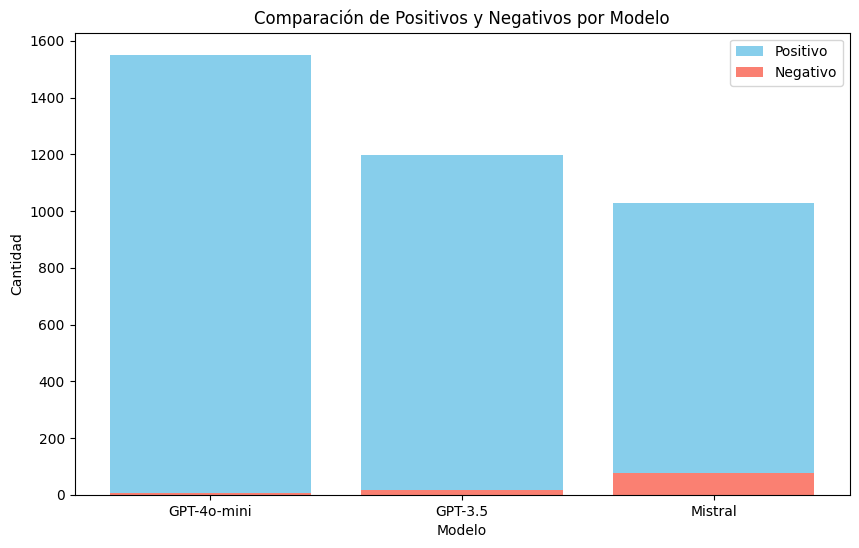

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica de barras para las columnas 'positivo' y 'negativo'
plt.figure(figsize=(10, 6))
plt.bar(df['modelo'], df['positivo'], label='Positivo', color='skyblue')
plt.bar(df['modelo'], df['negativo'], label='Negativo', color='salmon')

# Añadir etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Cantidad')
plt.title('Comparación de Positivos y Negativos por Modelo')
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
import numpy as np

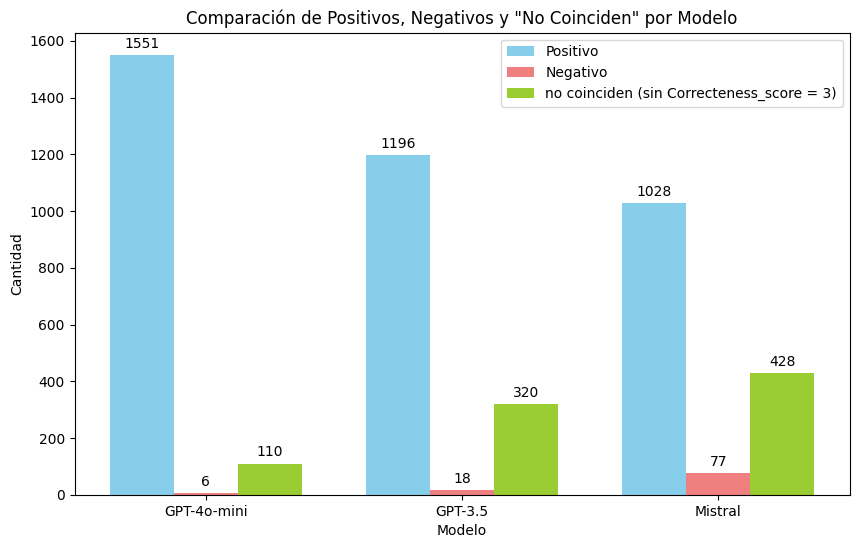

In [ ]:
x = np.arange(len(df['modelo']))  # posición en el eje x para cada modelo
width = 0.25  # ancho de cada barra (más estrecho para acomodar las tres barras)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las barras para 'positivo', 'negativo' y 'no coinciden' una al lado de la otra
bars1 = ax.bar(x - width, df['positivo'], width, label='Positivo', color='skyblue')
bars2 = ax.bar(x, df['negativo'], width, label='Negativo', color='lightcoral')
bars3 = ax.bar(x + width, df['no coinciden (sin Correcteness_score = 3)'], width, label='no coinciden (sin Correcteness_score = 3)', color='yellowgreen')

# Añadir los valores encima de cada barra
for bars in [bars1, bars2, bars3]:  # Itera sobre cada conjunto de barras
    for bar in bars:
        ax.annotate(f'{int(bar.get_height())}',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # desplazamiento de los números
                    textcoords="offset points",
                    ha='center', va='bottom')

# Añadir etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Positivos, Negativos y "No Coinciden" por Modelo')
ax.set_xticks(x)
ax.set_xticklabels(df['modelo'])
ax.legend()

# Mostrar la gráfica
plt.show()